In [3]:
import pandas as pd

# Get heights data from Galton's dataset
heights = pd.read_csv('galton.csv')

# Add a tall column and initialize to  0
heights['Tall'] = 0
thresholds = []

# Determine if kids are tall or not for their gender
for gender in ['M', 'F']:
    threshold = heights[heights['Gender'] == gender].describe().loc['50%', 'Height']
    heights['Tall'] += (heights['Gender'] == gender) & (heights['Height'] >= threshold)
    thresholds.append(threshold)

# Determine if parents were tall or not
for parent in ['Father', 'Mother']:
    threshold = heights.describe().loc['50%', parent]
    heights[f'Tall {parent}'] = 1 * (heights[parent] >= threshold)

heights.head()

,Family,Father,Mother,Gender,Height,Kids,Tall,Tall Father,Tall Mother
0,1,78.5,67.0,M,73.2,4,1,1,1
1,1,78.5,67.0,F,69.2,4,1,1,1
2,1,78.5,67.0,F,69.0,4,1,1,1
3,1,78.5,67.0,F,69.0,4,1,1,1
4,2,75.5,66.5,M,73.5,4,1,1,1


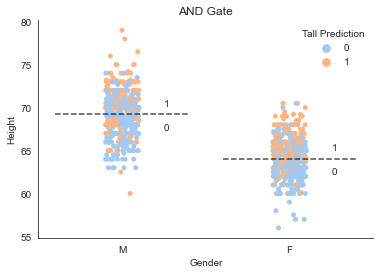

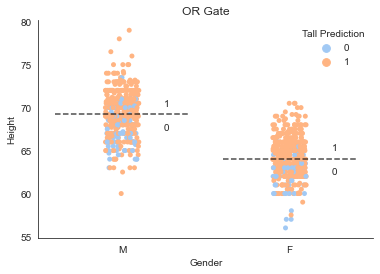

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a prediction column
for gate in ['AND', 'OR']:

    # Create a column for predictions
    if gate == 'AND':
        heights['Prediction'] = heights['Tall Father'] & heights['Tall Mother']
    else:
        heights['Prediction'] = heights['Tall Father'] | heights['Tall Mother']

    # Plot the data after shuffling it
    sns.set_style('white'); sns.set_palette('pastel')
    sns.stripplot(data=heights.sample(frac=1, random_state=3), x='Gender', y='Height', hue='Prediction')

    # Lines for thresholds
    plt.axhline(y=thresholds[0], xmin=0.05, xmax=0.45, c='k', ls='--', alpha=0.7, zorder=3)
    plt.axhline(y=thresholds[1], xmin=0.55, xmax=0.95, c='k', ls='--', alpha=0.7, zorder=4)

    # Adjust legend and minor details
    plt.text(0.25, thresholds[0] + 1, '1'); plt.text(0.25, thresholds[0] - 1.8, '0')
    plt.text(1.25, thresholds[1] + 1, '1'); plt.text(1.25, thresholds[1] - 1.8, '0')
    plt.legend(title='Tall Prediction', frameon=False)
    plt.title(f'{gate} Gate')

    # Save and show the figure
    sns.despine()
    plt.savefig(f'{gate}_gated_heights.png', dpi=200)
    plt.show()